# Navigating Emissions Reduction: Analyzing the Impact of Petrol Taxes on Transportation Emissions
by Team Leopard: Emily Sun Reed, Jeanne Salamin, Camille Vermenouzelle

Cloning into 'DS'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 52 (delta 16), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (52/52), 3.77 MiB | 6.32 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/DS/DS/DS/DS/DS/DS/DS
API_EN.POP.DNST_DS2_en_csv_v2_5995050.csv  H3.png
Cover					   IV.png
DAG					   LAND_USE_10122023145132626.csv
DP_LIVE_04122023173430735.csv		   merged_dataset_with_all_data.csv
DP_LIVE_04122023175707815.csv		   NEW_API_EN.POP.DNST_DS2_en_csv_v2_5995050.csv
DP_LIVE_19122023145241405.csv		   population-density.csv
H1.png					   README.md
H2.png


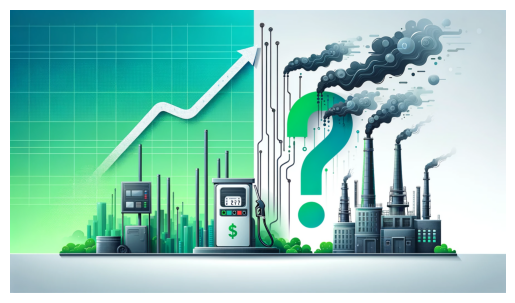

In [29]:
!git clone https://github.com/emilysr2/DS.git
%cd DS
!ls
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('Cover')
plt.imshow(img)
plt.axis('off')
plt.show()

In [27]:
# PACKAGES
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import statistics as st
import pandas as pd
import plotly.express as px
import os
import statsmodels.api as sm
import re
!pip install stargazer
from stargazer.stargazer import Stargazer
!pip install linearmodels
from linearmodels.panel import PanelOLS

# FUNCTIONS FROM PACKAGES
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression



---



## Introduction

The urgent challenge of mitigating climate change has led to various policy interventions, among which environmental taxation, specifically petrol tax, is a prominent tool. The article "Carbon Taxes and CO₂ Emissions: Sweden as a Case Study" by Julius J. Andersson serves as a critical reference for this topic. Andersson's findings demonstrate a significant decrease in CO₂ emissions from transportation in Sweden following the introduction of a carbon tax. By providing a real-world example of successful environmental taxation, Andersson's study inspires our research on how similar policies might impact emissions in different national and infrastructural contexts.

Mainly, this notebook focuses on examining the complex relationship between petrol taxation and the emission of greenhouse gases (GHG) in the transportation industry. Our research is driven by the desire to comprehensively understand the direct effects of petro taxes on GHG emissions and the underlying processes and various influencing factors that shape this interaction, providing nuanced insights to help guide policymakers. By uncovering reasons for potential inefficiencies in petrol taxation, such as the absence of public transportation alternatives, we hope to inform more targeted and effective policy approaches.


## Literature Review

The prevailing body of literature on the impact of fuel taxes on GHG emissions in transportation offers valuable insights, yet notable gaps persist. Studies such as "Exiting the Fossil World" (Bretschger & Grieg, 2020) and "Estimating the Effect of a Gasoline Tax on Carbon Emissions" (Davis & Kilian, 2009) contribute nuanced analyses within specific countries. However, the inherent limitation of these studies lies in their singular focus, potentially constraining the applicability of findings to a broader international context.

Similarly, research by Jacobs et al. (2022) and Harju et al. (2022) delves into distributional effects and economic burden sharing, offering vital perspectives on the societal impacts of fuel taxes. These studies consider income and spatial heterogeneity, providing depth to understanding how these taxes affect different segments of society.

Expanding the geographical scope, Firtescu et al. (2023) provide a broader international analysis by examining environmental tax levels and GHG emissions across 28 European countries. However, a common limitation in this diverse landscape is the focus on CO₂ emissions.

Recognising this gap, our research aims to contribute by investigating the impact of petrol taxes, specifically on overall GHG emissions. The efficiency of petrol taxes in diminishing GHG emissions from transportation remains an open question in the literature. While existing studies often focus on  CO₂ emissions, our inquiry into the broader spectrum of GHG aims to provide a more comprehensive understanding of the environmental effectiveness of petrol taxes in the transportation sector.

## DAG Analysis

Cloning into 'DS'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 47 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (47/47), 1.90 MiB | 5.42 MiB/s, done.
Resolving deltas: 100% (14/14), done.
/content/DS/DS/DS/DS/DS/DS
API_EN.POP.DNST_DS2_en_csv_v2_5995050.csv  H3.png
DAG					   IV.png
DP_LIVE_04122023173430735.csv		   LAND_USE_10122023145132626.csv
DP_LIVE_04122023175707815.csv		   merged_dataset_with_all_data.csv
DP_LIVE_19122023145241405.csv		   NEW_API_EN.POP.DNST_DS2_en_csv_v2_5995050.csv
H1.png					   population-density.csv
H2.png					   README.md


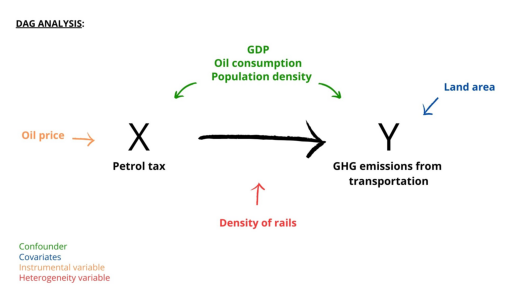

In [28]:
!git clone https://github.com/emilysr2/DS.git
%cd DS
!ls
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('DAG')
plt.imshow(img)
plt.axis('off')
plt.show()



The DAG diagram displays all of the variables we are studying and the analytical strategy. Alongside the independent variable, petrol tax (denoted as "X"), and the dependent variable, GHG emissions from transportation (denoted as "Y"), we have incorporated several other factors. The DAG helps us to consider the direct and indirect effects of petrol taxes on GHG, the role of potential controls that might bias our result, and the pathways through which other variables might moderate or influence these relationships:

1. GDP, Oil Consumption, and Population Density: These are the confounders. We identified these as they can influence both X and Y. For example, a higher GDP often correlates with higher fuel consumption and a potential for more significant emissions. By controlling for these variables, we aim to isolate the effect of the petrol tax from these other factors.
2. Density of Rail Lines: This is considered a heterogeneity variable. In regions with more developed rail infrastructure, the petrol tax might have a more pronounced effect on reducing emissions because people can switch to other modes of public transport.
3. Land Area: This is a covariate as it directly impacts Y independent of X. The rationale is that the transportation needs for larger areas differ from those of smaller places, potentially leading to more emissions.
4. Oil price: We chose it as the instrumental variable that only affects X but does not directly affect Y. Fluctuations in oil prices can precipitate changes in petrol taxes as governments respond to shifts in the global market.


## Sample

This study draws data from the OECD, QoG, and Our World in Data datasets.

The analysis sample comprises 34 countries across ten years between 2010 and 2019, constrained by the availability of the petrol tax records. The countries are mainly OECD countries apart from the USA, Australia and Canada. The detailed coverage of countries can be found in the appendix.

To obtain consistency in the sample, some observations have been extrapolated due to missing numerical data in the database. The missing data for USA petrol tax in 2015 was imputed by calculating the mean of the adjacent years (2014 and 2016), while for France's rail line density in 2014, a similar approach was employed using the average values from 2013 and 2015. Consequently, the sample is composed of 340 observations for the OLS linear regressions with controls, 303 observations for the Ordinary Least Squares (OLS) linear regression with the heterogeneity interaction term, and 260 for the OLS two-stage least squares (2SLS) regression.

Variables, namely GHG, oil consumption, and land area with a skewness larger than 3, have been log-transformed to mitigate the influence of extreme values, handle the wide range of values and make the data more comparable between countries.

To account for numerical scale biases, all independent variables have been standardized by scaling the data to have a mean of 0 and a standard deviation of 1, enabling consistent and coherent comparison of variables and mitigating potential biases.


Let's visualise the sample.

In [26]:
# Let's visualise the sample

url = 'https://raw.githubusercontent.com/Jeanne012/SDS/main/database%20report'

df_filtered = pd.read_csv(url)
df_filtered.tail(5)

,index,CountryCode,Country,year,PetrolTax_st,GHGEmissions_log,GDP_st,Population_density_st,Density_raillines_st,Oil_consumption_log_st,Land_area_log_st,Oil_price_st
335,3725,USA,United States of America,2015,-2.213820,14.358954,0.856864,-0.795195,-1.028996,2.640160,2.324553,-1.332061
336,3726,USA,United States of America,2016,-2.216503,14.381757,0.920694,-0.793114,-1.030481,2.645093,2.324553,-1.643617
337,3727,USA,United States of America,2017,-2.218436,14.393962,1.039565,-0.791050,-1.031451,2.651733,2.324553,-1.240613
338,3728,USA,United States of America,2018,-2.221564,14.411923,1.209867,-0.789172,-1.033059,2.668159,2.324553,-0.802376
339,3729,USA,United States of America,2019,-2.223358,14.414708,1.343272,-0.787429,-1.036167,2.667099,2.324553,-0.915597


## Method and Results for each analysis




### OLS Method
This study employs an OLS regression model to examine the impact of petrol tax on GHG in transportation, motivated by several factors. Firstly, an anticipated linear relationship between petrol tax and emissions suggests that as taxes increase, consumers may linearly reduce fuel consumption, resulting in a proportional emissions decrease. Secondly, the flexibility of this model enables it to handle multiple independent variables and control for confounding factors. Finally, OLS is suitable for a cross-section sample, as in this study.

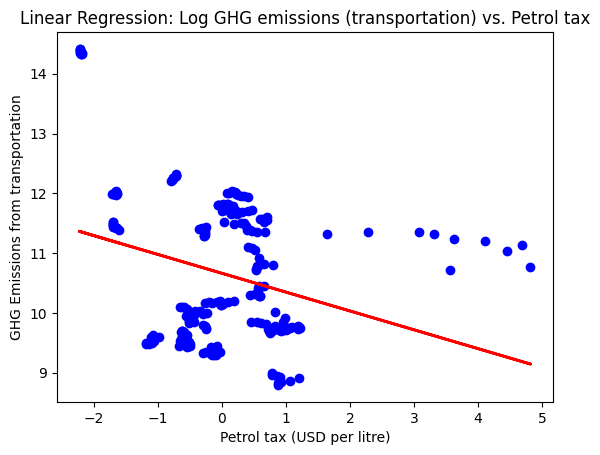

Slope: -0.31502021328723473
Intercept: 10.662679411411144
Mean Squared Error: 1.4344045739640838


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Extracting the features and target variable
X = df_filtered['PetrolTax_st'].values.reshape(-1, 1)
y = df_filtered['GHGEmissions_log'].values


# Creating a linear regression model
model = LinearRegression()

# Fitting the model
model.fit(X, y)

# Making predictions
y_pred = model.predict(X)

# Calculating the coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Plotting the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Log GHG emissions (transportation) vs. Petrol tax')
plt.xlabel('Petrol tax (USD per litre)')
plt.ylabel('GHG Emissions from transportation')
plt.show()

# Displaying the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Mean Squared Error: {mse}")

### OLS Regression Results
The OLS regression result (Appendix 3) indicates that the effect of petrol taxes on GHG emissions is conditional on several factors. Initially, a standalone inverse relationship is observed (model 1: PetrolTax_st coefficient of -0.369), but this effect diminishes once additional control variables are accounted for. In models (2) and (3), the PetrolTax_st coefficient becomes statistically insignificant (-0.006 and 0.017, respectively), suggesting that the initial observed effect may be confounded by these other factors. Introducing the covariate - land area (model 4: Land_area_log_st coefficient of -0.180) shows emissions decrease with increasing land area. This could reflect lower population density or different energy usage patterns not directly captured by the other variables in the model. The interaction term in model (5) shows a stronger negative effect of petrol taxes in areas with higher rail line density (PetrolTax_st*Density_raillines_st coefficient of -0.039), which supports the hypothesis that easier access to alternative forms of transportation enhances the effectiveness of petrol taxes in reducing emissions. To understand this dynamic comprehensively, a deeper analysis of rail line density as heterogeneity is given later in the report. Overall, the R-square values (0.977 or more significant) across all models indicate a good fit, especially from model(2) onwards after the controls are added.

### Fixed Effects Method

Fixed effects are integrated into the model, enabling the accounting of unobserved, time-invariant factors both within countries and over time. Time-fixed effects are the same for all countries but vary from one year to the other (e.g. Greta Thunberg), and fixed entity effects are always the same within a country but vary from one country to the other (e.g. relief of a country).

### Fixed Effects Results
In the graph below, the fixed effect fits one regression line per country. The lines are parallel, meaning that the fixed effect assumes that the causal effect is constant across all countries. This visual representation points to a consistent negative relationship between petrol taxes and GHG across the dataset, indicating that, within each country, increases in petrol taxes are associated with reductions in emissions

The high overal R-squared value (0.9662) from the regression (Appendix 4)  with the fixed effects suggests that the model with fixed effects accounts for a substantial amount of the variation in GHG across countries and over time.This is a improvement, indicating that the model fits the data well and that the fixed effects are capturing much of the variation that would otherwise be unexplained.



Text(0.5, 1.0, 'Fixed Effects Regression: GHG Emissions vs. Petrol Tax')

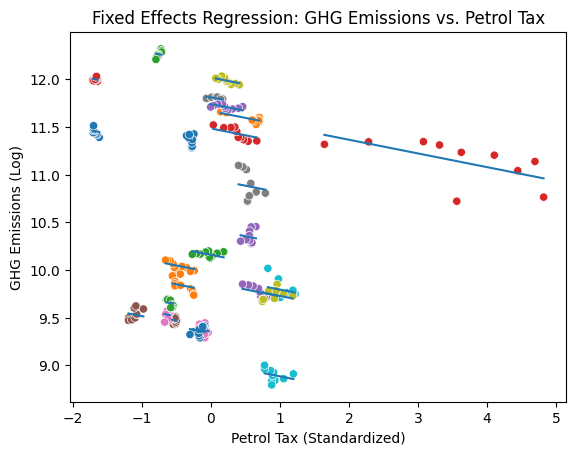

In [21]:
#Let's visualise our Fixed effects

# Creating a 2 level multi-index for PanelOLS, necessary step for it to process the dataframe
df_copy = df_filtered.copy()
df_copy = df_copy.set_index(['CountryCode', 'year'])
df_copy

# subset
df_plot = df_copy[(df_copy["PetrolTax_st"] > -2) & (df_copy["PetrolTax_st"] < 5)].copy()

# estimate ols and store fitted values
est_ols = sm.OLS.from_formula("GHGEmissions_log ~ PetrolTax_st", data=df_plot).fit(cov_type="HC1")
df_plot["fitted_values"] = est_ols.fittedvalues

# plot observations
sns.scatterplot(x='PetrolTax_st', y='GHGEmissions_log', data=df_plot, color = "r", s = 20)

# get number of countries
cou = np.unique(df_plot.loc[:,"Country"].values)
colors = sns.color_palette(n_colors=len(cou)).as_hex()

# estimate ols and store fitted values
est_ols = sm.OLS.from_formula("GHGEmissions_log ~ PetrolTax_st", data=df_plot).fit(cov_type="HC1")
df_plot["fitted_values"] = est_ols.fittedvalues

# estimate fe with dummies and store fitted values
est_fe = sm.OLS.from_formula("GHGEmissions_log ~ PetrolTax_st + C(Country)", data=df_copy).fit(cov_type="HC1")
df_plot["fitted_values_fe"] = est_fe.fittedvalues

# plot observations
sns.scatterplot(x='PetrolTax_st', y='GHGEmissions_log', data=df_plot, hue="Country", legend = False,
                palette = colors)

# plot fe fit lines (crossing fitted values)
for i in range(len(cou)):
    df_temp = df_plot.query(f"Country=='{cou[i]}'")
    sns.lineplot(x='PetrolTax_st', y='fitted_values_fe', data=df_temp, hue="Country", legend = False)

#Set axis labels and title
plt.xlabel('Petrol Tax (Standardized)')
plt.ylabel('GHG Emissions (Log)')
plt.title('Fixed Effects Regression: GHG Emissions vs. Petrol Tax')


### Large Panel OLS Method

We expanded the OLS regression to encompass the entire dataset, examining the basic effect of petrol tax implementation. This involved creating a dummy variable for petrol tax: “1” indicating any level of petrol tax and “0” for its absence. Using this binary variable, the regression compared the average impact on GHG between countries with and without petrol tax policies.





### Large Panel OLS Results

Using a binary variable for petrol tax in the regression (Appendix 5) on the larger dataset reveals that a petrol tax is generally associated with lower emissions. Moreover, the general pattern of the result seems to be similar to that of the OLS regression.


### IV Method



Cloning into 'DS'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (42/42), 1.83 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/DS/DS/DS/DS/DS
API_EN.POP.DNST_DS2_en_csv_v2_5995050.csv  IV.png
DP_LIVE_04122023173430735.csv		   LAND_USE_10122023145132626.csv
DP_LIVE_04122023175707815.csv		   merged_dataset_with_all_data.csv
DP_LIVE_19122023145241405.csv		   NEW_API_EN.POP.DNST_DS2_en_csv_v2_5995050.csv
H1.png					   population-density.csv
H2.png					   README.md
H3.png


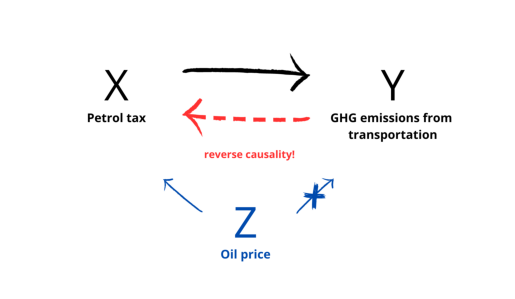

In [22]:
!git clone https://github.com/emilysr2/DS.git
%cd DS
!ls
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('IV.png')
plt.imshow(img)
plt.axis('off')
plt.show()

Endogeneity can also arise from reverse causation, where the level of GHG influences petrol tax policy decisions. For example, policymakers might respond to increasing GHG by implementing higher petrol taxes to reduce fuel consumption and environmental impact.

In order to obtain reliable and unbiased estimates of the impact of petrol tax on GHG, an instrumental variable (IV) is employed to isolate the exogenous variation in petrol tax. The IV, represented by the Oil price, serves to mitigate endogeneity issues by being correlated with the endogenous variable (Petrol tax). Implicit in our approach is the assumption that the exclusion restriction holds true, indicating that the instrument influences GHG solely through its impact on the petrol tax. Notably, this instrumental variable has been previously utilized by scholars, as evidenced in Andersson's (2019) case study on the effect of carbon taxes on emissions.

### IV Results


The first stage (Appendix 6)  shows that a one-standard-deviation increase in oil price is associated with a statistically significant decrease in the predicted value of petrol tax by 0.1292 standard deviation units.
Moreover, the independent variables explain 47.6% of the variation in the standardized petrol tax, and the F-statistic is 112.0.

In the second stage (Appendix 6), the coefficient of fitted Petrol Tax is not statistically significant (p-value > 0.05). Therefore, the interpretation of the impact of fitted Petrol Tax on GHG should be cautious. Nevertheless, oil consumption is statistically significant and positively associated with GHG. This suggests that higher oil consumption is associated with higher GHG from transportation.

Is there something else?
After analyzing the results from the 2SLS regression, there may be a reverse causation between oil prices and petrol taxes. Indeed, changes in petrol taxes could impact consumer behavior and the demand for petrol. This change in demand might affect oil prices due to shifts in the market.
Moreover, we conducted an F-statistic (on stata) of the instrument to see its validity, and the outcome is 6.24, lower than the threshold of 10, suggesting that this instrument might be weak.



### DiD Method
Finally, employing a DiD analysis, this study investigates the impact of a petrol tax shock on GHG emissions in Italy compared to France, isolating the effect from potential confounding factors. Leveraging variations in the timing and intensity of the petrol tax shock between the two countries, the DiD method allows for the control of time-varying factors, providing a robust attribution of changes in GHG to the petrol tax shock.


### DiD Results

Italy is undergoing a significant shock with a petrol tax change of 0.14 tax rates per liter, reflecting a simultaneous decrease in GHG. In contrast, France is not experiencing any such shocks, making it a suitable control group. The choice of Italy as the treatment group and France as the control is further justified by their comparability, including similar levels of oil consumption, GDP per capita, and density of rail lines.


This graph has triggered our curiosity about the causal relationship between the petrol tax shock and its impact on environmental outcomes in Italy.








In [23]:
urldid = 'https://raw.githubusercontent.com/Jeanne012/SDS/main/did%20data%20final'

df = pd.read_csv(urldid)
df.tail(5)

,index,CountryCode,Country,year,PetrolTax_st,GHGEmissions_log,GDP_st,Population_density_st,Density_raillines_st,Oil_consumption_log_st,Land_area_log_st
35,1670,ITA,Italy,2015.0,0.675377,11.577718,0.783512,-0.048664,0.539111,0.883038,0.490060
36,1671,ITA,Italy,2016.0,0.678178,11.567508,0.950502,-0.048958,0.546050,0.877386,0.490060
37,1672,ITA,Italy,2017.0,0.642078,11.528191,1.042388,-0.049254,0.545931,0.886268,0.490060
38,1673,ITA,Italy,2018.0,0.608975,11.562991,1.122923,-0.049580,0.545243,0.902566,0.490060
39,1674,ITA,Italy,2019.0,0.591295,11.574393,1.252334,-0.049966,0.545012,0.881651,0.490059


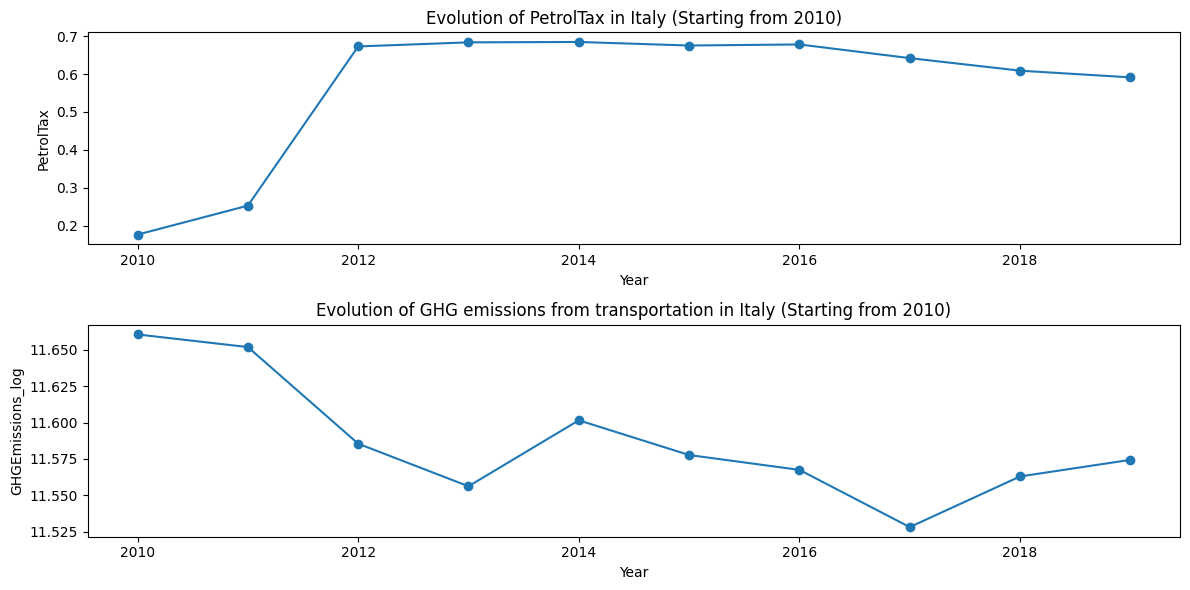

In [24]:
import matplotlib.pyplot as plt

# Filter data for Italy and starting from 2010
italy_data = df[df['CountryCode'] == 'ITA']
italy_data_from_2010 = italy_data[italy_data['year'] >= 2010]

# Plot the evolution of 'PetrolTax'
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(italy_data_from_2010['year'], italy_data_from_2010['PetrolTax_st'], marker='o', linestyle='-')
plt.title('Evolution of PetrolTax in Italy (Starting from 2010)')
plt.xlabel('Year')
plt.ylabel('PetrolTax')

# Plot the evolution of 'GHGEmissions_log'
plt.subplot(2, 1, 2)
plt.plot(italy_data_from_2010['year'], italy_data_from_2010['GHGEmissions_log'], marker='o', linestyle='-')
plt.title('Evolution of GHG emissions from transportation in Italy (Starting from 2010)')
plt.xlabel('Year')
plt.ylabel('GHGEmissions_log')

plt.tight_layout()
plt.show()

To mitigate concerns about parallel trends, we extended our analysis of GHG to the year 2000. This prolonged period demonstrates that the trends in GHG share a comparable trajectory before the implementation of the treatment.


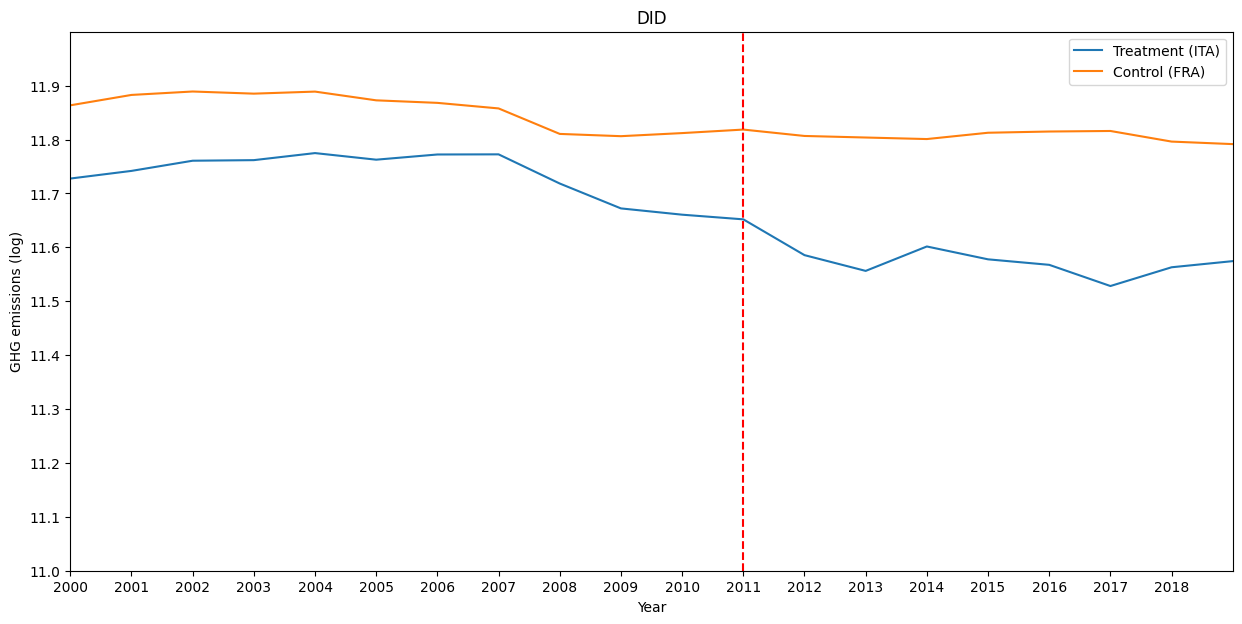

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 7))  # Adjust the size here

countries_to_plot = ['Italy', 'France']

for country in countries_to_plot:
    plt.plot(df[df['Country'] == country]['year'],
             df[df['Country'] == country]['GHGEmissions_log'],
             linestyle='-', label=country)

plt.title("DID")
plt.xlabel("Year")
plt.ylabel("GHG emissions (log)")
plt.axvline(x=2011, ymin=0, ymax=6, color='red', linestyle='--', label='Treatment Year (2011)')

plt.xticks(np.arange(2000, 2019, 1))
plt.xlim(2000, 2019)

# Add y-axis scale
plt.yticks(np.arange(11, 12, 0.1))
plt.ylim(11, 12)

plt.legend(labels=['Treatment (ITA)', 'Control (FRA)'])
plt.show()


The regression results (Appendix 7) indicate that the 'post' coefficient shows no significant change in the outcome for France over time. Similarly, the 'treat' coefficient suggests no significant difference in the outcome between the Italian and French groups before the 2011 petrol tax shock. Both findings support the assumption that any observed differences in outcomes after the shock can be attributed to the treatment rather than pre-existing disparities. Additionally, the negative coefficient of 'post: treat' suggests a statistically significant decrease in the outcome variable for Italy compared to France after the 2011 shock, implying a potential causal relationship.

To finalize this analysis, we ran a placebo test (Appendix 8) stimulating a treatment in 2005, a year without intervention, to check the reliability of our findings.  The statistically non-significant interaction term (post:treat) from this test (p-value = 0.2341) indicates that there was no treatment effect during this placebo period, lending credibility to the actual treatment effect being real.

## Heterogeneity

We executed a set of heterogeneity tests (Appendix 9) to determine if specific features or conditions shape the relationships and patterns observed in the data. Our analysis presents the marginal effect of an increase in petrol tax at different levels of road density, rail lines density, and road passenger transport.

### 1. Density of Rail Lines



In [ ]:
!git clone https://github.com/emilysr2/DS.git
%cd DS
!ls
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('H1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

We initially anticipated that the OLS coefficients would reveal a more pronounced negative relationship between petrol taxes and GHG from transportation in countries with a high density of rail lines. Our reasoning was rooted in the belief that transitioning from motor-fueled vehicles to alternative modes of transportation would be more feasible in countries where diverse options, such as extensive rail networks, are readily available.

However, our empirical findings revealed that an increase in petrol taxes corresponded to an increase in GHG from transportation in countries with low rail line density. In contrast, the opposite effect was observed in high-density rail line countries. Furthermore, our analysis highlighted that reliance on trains as a green alternative may not be straightforward. Trains, despite being considered eco-friendly, can still contribute to GHG from transportation, particularly if the electricity required is polluting. Additionally, even in regions with well-developed rail lines, the high cost of tickets could pose a barrier to widespread adoption.

### 2. Passenger Transport







In [ ]:
!git clone https://github.com/emilysr2/DS.git
%cd DS
!ls
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('H2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

The variable "road passenger transport" measures the mobility of people within a specific area or country. A higher value in road passenger transport indicates a greater travel volume on the existing network. Consequently, our initial expectation was a pronounced negative correlation between petrol taxes and GHG from transportation in countries with higher road passenger transport.

It turns out that petrol taxes reduce GHG from transportation exclusively in countries with low road passenger transport. This outcome suggests that in regions with lower mobility, there is potentially a higher reliance on motor vehicles for transportation. In such contexts, the impact of petrol taxes on consumer behavior is likely more significant, given the limited availability of alternative transportation options.

Furthermore, our findings indicate that in countries characterized by high mobility, the effect of petrol taxes on GHG is positive. This could be attributed to a lower fuel demand elasticity in such regions.

### 3. Density of Roads





In [ ]:
!git clone https://github.com/emilysr2/DS.git
%cd DS
!ls
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('H3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

We conducted a final heterogeneity test using the variable "density of roads", as a proxy for a country's reliance on motorized vehicles for transportation. Our initial anticipation was that the impact of petrol taxes would be even more negatively pronounced in countries with a high density of roads.

Unexpectedly, in countries with low road density, GHG from transportation increased when petrol taxes were raised. Residents in these areas may face economic constraints that limit their ability to adapt to higher petrol prices. The socio-economic aspects of the tax emerged as a crucial factor warranting careful consideration.

In contrast, when considering countries with a high density of roads, the observed effects aligned with our predictions. The petrol tax proved to be an efficient tool in curbing GHG from transportation. The accessibility of alternative transportation options, coupled with a potentially higher economic capacity to adapt to changes in petrol prices, appeared to contribute to the successful outcomes in these regions.

We conducted a final heterogeneity test using the variable "density of roads", as a proxy for a country's reliance on motorized vehicles for transportation. Our initial anticipation was that the impact of petrol taxes would be even more negatively pronounced in countries with a high density of roads.

Unexpectedly, in countries with low road density, GHG from transportation increased when petrol taxes were raised. Residents in these areas may face economic constraints that limit their ability to adapt to higher petrol prices. The socio-economic aspects of the tax emerged as a crucial factor warranting careful consideration.

In contrast, when considering countries with a high density of roads, the observed effects aligned with our predictions. The petrol tax proved to be an efficient tool in curbing GHG from transportation. The accessibility of alternative transportation options, coupled with a potentially higher economic capacity to adapt to changes in petrol prices, appeared to contribute to the successful outcomes in these regions.

## Internal and external validity:

Ensuring the robustness and reliability of research findings necessitates thoroughly examining internal and external validity. Including pertinent control variables, namely GDP, country oil consumption, and population density, mitigate potential confounding factors. However, the study grapples with challenges related to endogeneity concerns surrounding petrol taxes, such as reverse causality. The choice of instrumental variables, notably oil price, is acknowledged as potentially problematic due to its correlation with unobserved determinants, prompting the need for alternative instruments. Acknowledging the importance of controlling for public transportation availability in heterogeneity testing underscores a data limitation.

The study demonstrates considerable strength in sample diversity, encompassing 34 countries over a decade, including non-OECD nations like the USA, Australia, and Canada. This broad geographical scope significantly bolsters the generalizability of the findings. However, caution is advised when extending these results to non-OECD countries, necessitating a nuanced discussion on the limitations of global applicability. Additionally, temporal considerations merit attention, with potential benefits arising from an extension beyond the years 2010 to 2019 to capture long-term trends.



# Conclusion
Our study underscores that petrol taxes alone may not constitute a consistently reliable tool for effectively reducing GHG emissions in the transportation sector. The varying impact of these taxes is strongly influenced by factors such as economic status, infrastructure, and the availability of public transport. This highlights the importance of adopting a balanced approach in policy-making, ensuring that environmental benefits align harmoniously with broader social and economic considerations.


# Appendix

## 1. Database

The Petrol tax data comes from the QoG database, which is notable for precise governmental records.
The OECD database provides comprehensive information on greenhouse gas emissions, GDP, land area, rail line density, crude oil import prices, and passenger transport.
Our World in Data also contributes reliable statistics on population density and oil consumption, ensuring a solid data foundation for our research.


## 2. Sample

In [ ]:

#Map of countries in our sample with the number of observations
df_map = df_filtered.groupby(['CountryCode']).size().reset_index(name='Number of observations')
fig = px.choropleth(df_map,
                    locations='CountryCode',
                    locationmode='ISO-3',
                    color='Number of observations',
                    hover_name='CountryCode',
                    title = 'Number of Observations by Country between 2010 and 2019',
                    color_continuous_scale='Plasma')


fig.update_layout(title_x=0.5, margin=dict(t=50, b=10))

fig.show()

## 3. OLS Regression Results

In [ ]:
# Extracting the features and target variable

X = df_filtered['PetrolTax_st']
y = df_filtered['GHGEmissions_log']

# Adding a constant term to the independent variable (for intercept)
X = sm.add_constant(X)

# Creating a linear regression model
model = sm.OLS(y, X).fit(cov_type="HC1")

# Displaying the regression summary
print(model.summary())

stargazer = Stargazer([model])
stargazer

In [ ]:
# Let's fit the OLS Regressions

ols_canned_results = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st', data=df_filtered).fit(cov_type="HC1")
ols_canned_results_control = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + Population_density_st + Oil_consumption_log_st', data=df_filtered).fit(cov_type="HC1")
ols_canned_results_control_gdp = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + GDP_st + Population_density_st + Oil_consumption_log_st', data=df_filtered).fit(cov_type="HC1")
ols_canned_results_control_rail = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + GDP_st + Population_density_st  + Oil_consumption_log_st+ PetrolTax_st*Density_raillines_st', data=df_filtered).fit(cov_type="HC1")
ols_canned_results_control_cofounders = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + GDP_st + Population_density_st + Oil_consumption_log_st + Land_area_log_st', data=df_filtered).fit(cov_type="HC1")



# Create a Stargazer instance and add the OLS results
stargazer = Stargazer([ols_canned_results, ols_canned_results_control, ols_canned_results_control_gdp, ols_canned_results_control_cofounders, ols_canned_results_control_rail])


# Titles
stargazer.title("Regression Results: Exploring the Effect of Petrol Tax on GHG Emissions")

# Column titles
column_titles = [
    "Baseline Model: OLS",
    "OLS + Controls",
    "OLS + GDP",
    "OLS + Covariate",
    "OLS + Rail Density Interaction"
]

# Add column titles
stargazer.custom_columns(column_titles, [1, 1, 1, 1, 1])

# Display the regression table
stargazer

## 4. Fixed Effects Regresion Results

In [ ]:
#Regression with fixed effects for time and country and controls
from linearmodels.panel import PanelOLS

# Assuming df_filtered is your DataFrame

# Create the independent variable X
X = sm.add_constant(df_filtered[['PetrolTax_st', 'GDP_st', 'Oil_consumption_log_st', 'Population_density_st', 'Land_area_log_st']])

# Dependent variable Y
Y = df_filtered['GHGEmissions_log']

# Add robust fixed effects for 'CountryCode' and 'year' using formula notation
formula = 'Y ~ 1 + PetrolTax_st + GDP_st + Population_density_st + Oil_consumption_log_st + EntityEffects + TimeEffects'
model_4 = PanelOLS.from_formula(formula, data=df_filtered.set_index(['CountryCode', 'year'])).fit()

# Get the regression summary
print(model_4)

## 5. Large Panel OLS Results

In [ ]:
#Let's fit the large panel regression
from stargazer.stargazer import Stargazer

url2= 'https://raw.githubusercontent.com/Jeanne012/SDS/main/large%20data'

df_large = pd.read_csv(url2)

# Creating a new dummy variable column 'D1'
# D1 is 0 if 'PetrolTax' is missing or less than 0, and 1 if 'PetrolTax' is greater than 0
df_large['D1'] = (df_large['PetrolTax_st'] > 0).astype(int)

# Display the first few rows to verify the new column
df_large.head()

# Fit the OLS model using the formula
ols_canned_results = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st', data=df_large).fit(cov_type="HC1")
ols_canned_results_control = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + Population_density_st + Oil_consumption_log_st', data=df_large).fit(cov_type="HC1")
ols_canned_results_control_gdp = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + GDP_st + Population_density_st + Oil_consumption_log_st', data=df_large).fit(cov_type="HC1")
ols_canned_results_control_rail = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + GDP_st + Population_density_st  + Oil_consumption_log_st+ PetrolTax_st*Density_raillines_st', data=df_large).fit(cov_type="HC1")
ols_canned_results_control_cofounders = sm.OLS.from_formula('GHGEmissions_log ~ 1 + PetrolTax_st + GDP_st + Population_density_st + Oil_consumption_log_st + Land_area_log_st', data=df_large).fit(cov_type="HC1")



# Create a Stargazer instance and add the OLS results
stargazer = Stargazer([ols_canned_results, ols_canned_results_control, ols_canned_results_control_gdp, ols_canned_results_control_cofounders, ols_canned_results_control_rail])


# Titles
stargazer.title("Large Panel Data Regression Results: Exploring the Effect of Petrol Tax on GHG Emissions")

#Colum tittles
column_titles = [
    "Baseline Model: OLS",
    "OLS + Controls",
    "OLS + GDP",
    "OLS + Covariate",
    "OLS + Rail Density Interaction"]


# Add column titles
stargazer.custom_columns(column_titles, [1, 1, 1, 1, 1])

# Display the regression table
stargazer

## 6. IV Regression Results

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming df_filtered is your DataFrame
df_filtered = df_filtered.dropna(subset=['PetrolTax_st', 'GDP_st', 'Population_density_st', 'GHGEmissions_log', 'Oil_price_st', 'Oil_consumption_log_st'])

# First Stage Regression
X_first_stage = sm.add_constant(df_filtered[['Oil_price_st', 'GDP_st', 'Population_density_st', 'Oil_consumption_log_st']])
Y_petrol_tax = df_filtered['PetrolTax_st']
first_stage = sm.OLS(Y_petrol_tax, X_first_stage).fit(cov_type='HC1')
df_filtered['PetrolTax_st_fitted'] = first_stage.fittedvalues

# Second Stage Regression
X_second_stage = sm.add_constant(df_filtered[['PetrolTax_st_fitted', 'GDP_st', 'Population_density_st', 'Oil_consumption_log_st']])
Y_ghg = df_filtered['GHGEmissions_log']
second_stage = sm.OLS(Y_ghg, X_second_stage).fit(cov_type='HC1')

# Visualization
plt.figure(figsize=(12, 6))

# Scatter plot for the first stage
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['PetrolTax_st'], Y_petrol_tax, label='Actual PetrolTax', alpha=0.5, color='blue')
plt.scatter(df_filtered['PetrolTax_st'], df_filtered['PetrolTax_st_fitted'], label='Fitted PetrolTax', alpha=0.5, color='red')
plt.title('First Stage: PetrolTax vs. Fitted PetrolTax')
plt.xlabel('PetrolTax')
plt.ylabel('Fitted PetrolTax')
plt.legend()

# Scatter plot for the second stage
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['PetrolTax_st_fitted'], Y_ghg, label='Actual GHGEmissions', alpha=0.5, color='blue')
plt.scatter(df_filtered['PetrolTax_st_fitted'], second_stage.fittedvalues, label='Fitted GHGEmissions', alpha=0.5, color='red')
plt.title('Second Stage: GHGEmissions vs. Fitted GHGEmissions')
plt.xlabel('Fitted PetrolTax')
plt.ylabel('Fitted GHGEmissions')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Viewing the results
print("First Stage Summary:\n", first_stage.summary())
print("\nSecond Stage Summary:\n", second_stage.summary())

## 7. DID Results

We chose to study France as it shares similarities with Italy in certain key characteristics.

Here are the means of the controls for France and Italy:
*  Oil consumption (1.123620 and 1.030605 mean, respectively)
*  GDP per capita (0.722279 and 0.654763 mean, respectively)
*  Density of rail lines (0.446211 and 0.512072 mean, respectively)


In [ ]:
urldid = 'https://raw.githubusercontent.com/Jeanne012/SDS/main/did%20data%20final'

df = pd.read_csv(urldid)
df.tail(5)

# Split the data into pre-treatment and post-treatment periods
italy_data = df[df['CountryCode'] == 'ITA']
france_data = df[df['CountryCode'] == 'FRA']

# Print summary statistics for the control and treatment groups
print("Summary Statistics - Control Group (Pre-treatment):")
print(italy_data[['Population_density_st', 'Oil_consumption_log_st', 'GDP_st', 'Density_raillines_st']].describe())

print("\nSummary Statistics - Treatment Group (Post-treatment):")
print(france_data[['Population_density_st', 'Oil_consumption_log_st', 'GDP_st', 'Density_raillines_st']].describe())

In [ ]:
# Prior to the DID, we create dummy variables to use as outcome
df_IF = df.loc[(df['Country'] == 'Italy') | (df['Country'] == 'France')].copy()

# Initialize columns with zeros
df_IF['post'] = 0
df_IF['treat'] = 0

# Update values based on conditions
df_IF.loc[df_IF['year'] > 2011, 'post'] = 1
df_IF.loc[df_IF['Country'] == 'Italy', 'treat'] = 1

# Display the first 50 rows
df_IF.head(5)

In [ ]:
df_IF['id'] = df_IF['treat']
df_IF['t'] = df_IF['year']
df_IF.reset_index(inplace=True)
df_IF = df_IF.set_index(['id', 't'])
df_IF.head(5)

In [ ]:
#Run the DID regression with Italy as treatment and France as a control

did = PanelOLS.from_formula("GHGEmissions_log ~ 1 + post + treat + post*treat + Population_density_st + Oil_consumption_log_st + GDP_st + Density_raillines_st", df_IF)
did = did.fit(cov_type='clustered')
print(did)

In [ ]:
#Let's visualise the Did regression statistical significance
from stargazer.stargazer import Stargazer
did1 = sm.OLS.from_formula("GHGEmissions_log ~ 1 + post + treat + post*treat + Population_density_st + Oil_consumption_log_st + GDP_st + Density_raillines_st", df_IF).fit(cov_type='HC1')

stargazer = Stargazer([did1])
stargazer

## 8. DID Placebo Test Results

In [ ]:
df_placebo = df


df_placebo['year'] = df_placebo['year'].astype(int)  # Convert the "year" column to integer
# Prior to the DID, we create dummy variables to use as outcome
df_placebo = df.loc[(df['Country'] == 'Italy') | (df['Country'] == 'France')].copy()


# Initialize columns with zeros
df_placebo['post'] = 0
df_placebo['treat'] = 0


# Update values based on conditions
df_placebo.loc[df_placebo['year'] > 2005, 'post'] = 1
df_placebo.loc[df_placebo['Country'] == 'Italy', 'treat'] = 1


# Display the first 50 rows
df_IF.head(50)

df_placebo['id'] = df_placebo['treat']
df_placebo['t'] = df_placebo['year']
df_placebo.reset_index(inplace=True)
df_placebo = df_placebo.set_index(['id', 't'])
df_placebo.head(5)


In [ ]:
Didplacebo = PanelOLS.from_formula("GHGEmissions_log ~ 1 + post + treat + post*treat + Population_density_st + Oil_consumption_log_st + GDP_st + Density_raillines_st", df_placebo)
ress = Didplacebo.fit(cov_type = 'clustered')
print(ress)

## 9. Heterogeneity

### Density of raillines (low vs high)

**Importing database**

In [ ]:
#Database download
url = 'https://raw.githubusercontent.com/cvermno/SDG/main/Density%20of%20raillines'

df = pd.read_csv(url)

In [ ]:
# Creating a 2 level multi-index for PanelOLS, necessary step for it to process the dataframe
df = df.set_index(['CountryCode', 'year'])
df

In [ ]:
# Step 1: Calculate the average per country for Densityraillines.
mean_density_by_country = df.groupby('Country')['Density_raillines'].mean()

# Step 2: Calculate the median of the averages per country.
median_density_by_country = mean_density_by_country.median()

# Step 3: Split the sample into two at the median of the averages per country.
low_density_countries = mean_density_by_country[mean_density_by_country <= median_density_by_country].index
high_density_countries = mean_density_by_country[mean_density_by_country > median_density_by_country].index

df_low_density = df[df['Country'].isin(low_density_countries)]
df_high_density = df[df['Country'].isin(high_density_countries)]

**OLS low density (with controls and fixed effects)**

In [ ]:
# Specify the dependent and independent variables
y_low_density = df_low_density['GHGEmissions_log']
X_low_density = df_low_density[['PetrolTax', 'GDP_standardized', 'Population_density_standardize','Land_area_standardize_log', 'Oil_consumption_standardize_log']]
X_low_density = sm.add_constant(X_low_density)

# Fit the panel data regression model using PanelOLS
model_low_density = PanelOLS(y_low_density, X_low_density, entity_effects=True, time_effects=True) # entity and time effects are included
results = model_low_density.fit(cov_type='clustered')

print(results)

**OLS high density (with controls and fixed effects)**

In [ ]:
# Specify the dependent and independent variables
y_high_density = df_high_density['GHGEmissions_log']
X_high_density = df_high_density[['PetrolTax', 'GDP_standardized', 'Population_density_standardize','Land_area_standardize_log', 'Oil_consumption_standardize_log']]
X_high_density = sm.add_constant(X_high_density)

# Fit the panel data regression model using PanelOLS
model_high_density = PanelOLS(y_high_density, X_high_density, entity_effects=True, time_effects=True) # entity and time effects are included
results = model_high_density.fit(cov_type='clustered')

print(results)

### Passenger transport (low vs high)

**Importing database**

In [ ]:
#Database download
url1 = 'https://raw.githubusercontent.com/cvermno/SDG/main/Passenger%20transport'

merged = pd.read_csv(url1)

In [ ]:
# Creating a 2 level multi-index for PanelOLS, necessary step for it to process the dataframe
merged = merged.set_index(['CountryCode', 'year'])
merged

In [ ]:
# Step 1: Calculate the average per country for Densityraillines.
mean_transport_by_country = merged.groupby('Country')['Passenger_Transport'].mean()

# Step 2: Calculate the median of the averages per country.
median_transport_by_country = mean_transport_by_country.median()

# Step 3: Split the sample into two at the median of the averages per country.
low_transport_countries = mean_transport_by_country[mean_transport_by_country <= median_transport_by_country].index
high_transport_countries = mean_transport_by_country[mean_transport_by_country > median_transport_by_country].index

df_low_transport = merged[merged['Country'].isin(low_transport_countries)]
df_high_transport = merged[merged['Country'].isin(high_transport_countries)]

**OLS low transport (with controls and fixed effects)**

In [ ]:
# Specify the dependent and independent variables
y_low_transport = df_low_transport['GHGEmissions_log']
X_low_transport = df_low_transport[['PetrolTax', 'GDP_standardized', 'Population_density_standardize', 'Land_area_standardize_log','Oil_consumption_standardize_log']]
X_low_transport = sm.add_constant(X_low_transport)

# Fit the panel data regression model using PanelOLS
model_low_transport = PanelOLS(y_low_transport, X_low_transport, entity_effects=True, time_effects=True)  # entity and time effects are included
results = model_low_transport.fit(cov_type='clustered')

print(results)

**OLS high transport (with controls and fixed effects)**

In [ ]:
# Specify the dependent and independent variables
y_high_transport = df_high_transport['GHGEmissions_log']
X_high_transport = df_high_transport[['PetrolTax','GDP_standardized', 'Population_density_standardize', 'Land_area_standardize_log','Oil_consumption_standardize_log']]
X_high_transport = sm.add_constant(X_high_transport)

# Fit the panel data regression model using PanelOLS
model_high_transport = PanelOLS(y_high_transport, X_high_transport, entity_effects=True, time_effects=True) # entity and time effects are included
results = model_high_transport.fit(cov_type='clustered')

print(results)

### Density of roads (low vs high)

**Importing database**

In [ ]:
#Database download
url0 = 'https://raw.githubusercontent.com/cvermno/SDG/main/Density%20of%20roads'

merged0 = pd.read_csv(url0)

In [ ]:
# Creating a 2 level multi-index for PanelOLS, necessary step for it to process the dataframe
merged0 = merged0.set_index(['CountryCode', 'year'])
merged0

In [ ]:
# Step 1: Calculate the average per country for Densityraillines.
mean_road_by_country = merged0.groupby('Country')['Density_roads'].mean()

# Step 2: Calculate the median of the averages per country.
median_road_by_country = mean_road_by_country.median()

# Step 3: Split the sample into two at the median of the averages per country.
low_road_countries = mean_road_by_country[mean_road_by_country <= median_road_by_country].index
high_road_countries = mean_road_by_country[mean_road_by_country > median_road_by_country].index

df_low_road = merged0[merged0['Country'].isin(low_road_countries)]
df_high_road = merged0[merged0['Country'].isin(high_road_countries)]

**OLS low road (with controls and fixed effects)**

In [ ]:
# Specify the dependent and independent variables
y_low_road = df_low_road['GHGEmissions_log']
X_low_road = df_low_road[['PetrolTax', 'GDP_standardized', 'Population_density_standardize', 'Land_area_standardize_log','Oil_consumption_standardize_log']]
X_low_road = sm.add_constant(X_low_road)

# Fit the panel data regression model using PanelOLS
model_low_road = PanelOLS(y_low_road, X_low_road, entity_effects=True, time_effects=True)  # entity and time effects are included
results = model_low_road.fit(cov_type='clustered')

print(results)

**OLS high transport (with controls and fixed effects)**

In [ ]:
# Specify the dependent and independent variables
y_high_road = df_high_road['GHGEmissions_log']
X_high_road = df_high_road[['PetrolTax','GDP_standardized', 'Population_density_standardize', 'Land_area_standardize_log','Oil_consumption_standardize_log']]
X_high_road = sm.add_constant(X_high_road)

# Fit the panel data regression model using PanelOLS
model_high_road = PanelOLS(y_high_road, X_high_road, entity_effects=True, time_effects=True) # entity and time effects are included
results = model_high_road.fit(cov_type='clustered')

print(results)

## 10. References

Bretschger, L., & Grieg, E. (2020). Exiting the Fossil World: The Effects of Fuel Taxation in the UK. ETH Zurich. Retrieved from https://ethz.ch/content/dam/ethz/special-interest/mtec/cer-eth/cer-eth-dam/documents/working-papers/WP-20-332.pdf

Davis, L. W., & Kilian, L. (2009). Estimating the Effect of a Gasoline Tax on Carbon Emissions (NBER Working Paper No. 14685). National Bureau of Economic Research. Retrieved from http://www.nber.org/papers/w14685

Firtescu, B. N., Brinza, F., Grosu, M., Doaca, E. M., & Siriteanu, A. A. (2023). The Effects of Energy Taxes Level on Greenhouse Gas Emissions in the Environmental Policy Measures Framework. Frontiers in Environmental Science, Sec. Environmental Economics and Management, Volume 10 - 2022, Article Number 965841. https://doi.org/10.3389/fenvs.2022.965841

Harju, J., Kosonen, T., Laukkanen, M., & Palanne, K. (2022). The Heterogeneous Incidence of Fuel Carbon Taxes: Evidence from Station-Level Data. Journal of Environmental Economics and Management, 112, 102607. ISSN 0095-0696. https://doi.org/10.1016/j.jeem.2021.102607.

Jacobs, L., Quack, L., & Mechtel, M. (2022). Distributional Effects of Carbon Pricing by Transport Fuel Taxation. Energy Economics, 114, 106290. Retrieved from https://www.sciencedirect.com/science/article/abs/pii/S0140988322004194

Smith, J. D., & Johnson, M. A. (2017). The Impact of Fuel Taxes on Carbon Emissions: Evidence from a Quasi-Experiment. American Economic Journal: Economic Policy, 9(4), 336-376. https://pubs.aeaweb.org/doi/pdfplus/10.1257/pol.20170144

Sterner, T. (2007). Fuel taxes: An important instrument for climate policy. Energy Policy. Retrieved from https://www.efdinitiative.org/sites/default/files/fuel20taxes20an20important20instrument20for20climate20policy20-20sterner.pdf

Vinberg, H. (2020). Effect of fuel tax on carbon dioxide emissions in Sweden - a panel estimation approach (No. 1312). Swedish University of Agricultural Sciences, Department of Economics, ISSN 1401-4084. Uppsala. Retrieved from https://stud.epsilon.slu.se/16192/5/Vinberg_H_200830.pdf